In [1]:
%cd '../../'

/Users/fei/Documents/Github/watson_nlp


In [2]:
import os
import sys
working_dir = os.getcwd()
sys.path.append(working_dir)

In [3]:
from watson_nlp.toolkit.performance.bilstm_perf_analytics import run_log_analytics
log_items = run_log_analytics(num_experiment_docs=200)

In [4]:
sent_lens_list =[]
for doc_log in log_items:
    sent_lens_list += doc_log[0]['sent_len']

In [5]:
from collections import Counter
sent_lens_freq = Counter(sent_lens_list)
sent_lens_bin = sorted(sent_lens_freq)

In [6]:
import matplotlib
matplotlib.use('tkagg')
import matplotlib.pyplot as plt

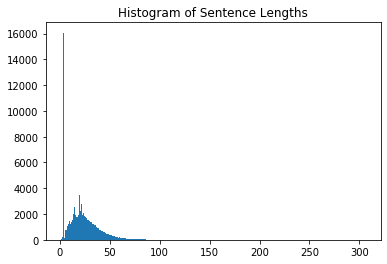

In [7]:
%matplotlib inline
_ = plt.hist(sent_lens_list, bins=sent_lens_bin)
plt.title("Histogram of Sentence Lengths")
plt.show()

In [8]:
batch_profile_list = []
for doc_log in log_items:
    batch_profile_list += doc_log[1]
for i in range(min(5, len(batch_profile_list))):
    print(batch_profile_list[i])

{'token_batch_shape': [96, 4], 'char_batch_shape': [96, 4, 10], 'peak_memory': [('/cpu:0', 1533533)], 'batch_runtime': 0.8804030418395996}
{'token_batch_shape': [32, 11], 'char_batch_shape': [32, 11, 15], 'peak_memory': [('/cpu:0', 1632461)], 'batch_runtime': 0.20219802856445312}
{'token_batch_shape': [49, 16], 'char_batch_shape': [49, 16, 14], 'peak_memory': [('/cpu:0', 3535281)], 'batch_runtime': 0.3080718517303467}
{'token_batch_shape': [71, 25], 'char_batch_shape': [71, 25, 18], 'peak_memory': [('/cpu:0', 9375920)], 'batch_runtime': 0.41774606704711914}
{'token_batch_shape': [85, 39], 'char_batch_shape': [85, 39, 16], 'peak_memory': [('/cpu:0', 15806272)], 'batch_runtime': 0.6400609016418457}


In [9]:
import pandas as pd
import numpy as np

batch_profile_df = pd.DataFrame(batch_profile_list)
batch_profile_df

,token_batch_shape,char_batch_shape,peak_memory,batch_runtime
0,"[96, 4]","[96, 4, 10]","[(/cpu:0, 1533533)]",0.880403
1,"[32, 11]","[32, 11, 15]","[(/cpu:0, 1632461)]",0.202198
2,"[49, 16]","[49, 16, 14]","[(/cpu:0, 3535281)]",0.308072
3,"[71, 25]","[71, 25, 18]","[(/cpu:0, 9375920)]",0.417746
4,"[85, 39]","[85, 39, 16]","[(/cpu:0, 15806272)]",0.640061
...,...,...,...,...
1411,"[32, 13]","[32, 13, 14]","[(/cpu:0, 1875969)]",0.192934
1412,"[73, 21]","[73, 21, 17]","[(/cpu:0, 7703686)]",0.298730
1413,"[74, 33]","[74, 33, 16]","[(/cpu:0, 11643808)]",0.474963
1414,"[51, 50]","[51, 50, 14]","[(/cpu:0, 11498175)]",0.625867


In [10]:
def clean_batch_profile(batch):
    batch_size = batch['token_batch_shape'][0]
    token_batch_size = np.prod(batch['token_batch_shape'])
    char_batch_size = np.prod(batch['char_batch_shape'])
    peak_memory = batch['peak_memory'][0][1]
    batch_runtime = batch['batch_runtime']
    return (batch_size, token_batch_size, char_batch_size, peak_memory, batch_runtime)

cleaned_batch_profile_list = [clean_batch_profile(batch) for batch in batch_profile_list]
#cleaned_batch_profile_list = [record for record in cleaned_batch_profile_list if record[4] < 300]


cleaned_batch_profile_df =  pd.DataFrame(data=cleaned_batch_profile_list,
                                         columns=['batch_size', 'token_batch_size', 'char_batch_size', 'peak_memory', 'batch_runtime'])
cleaned_batch_profile_df

,batch_size,token_batch_size,char_batch_size,peak_memory,batch_runtime
0,96,384,3840,1533533,0.880403
1,32,352,5280,1632461,0.202198
2,49,784,10976,3535281,0.308072
3,71,1775,31950,9375920,0.417746
4,85,3315,53040,15806272,0.640061
...,...,...,...,...,...
1411,32,416,5824,1875969,0.192934
1412,73,1533,26061,7703686,0.298730
1413,74,2442,39072,11643808,0.474963
1414,51,2550,35700,11498175,0.625867


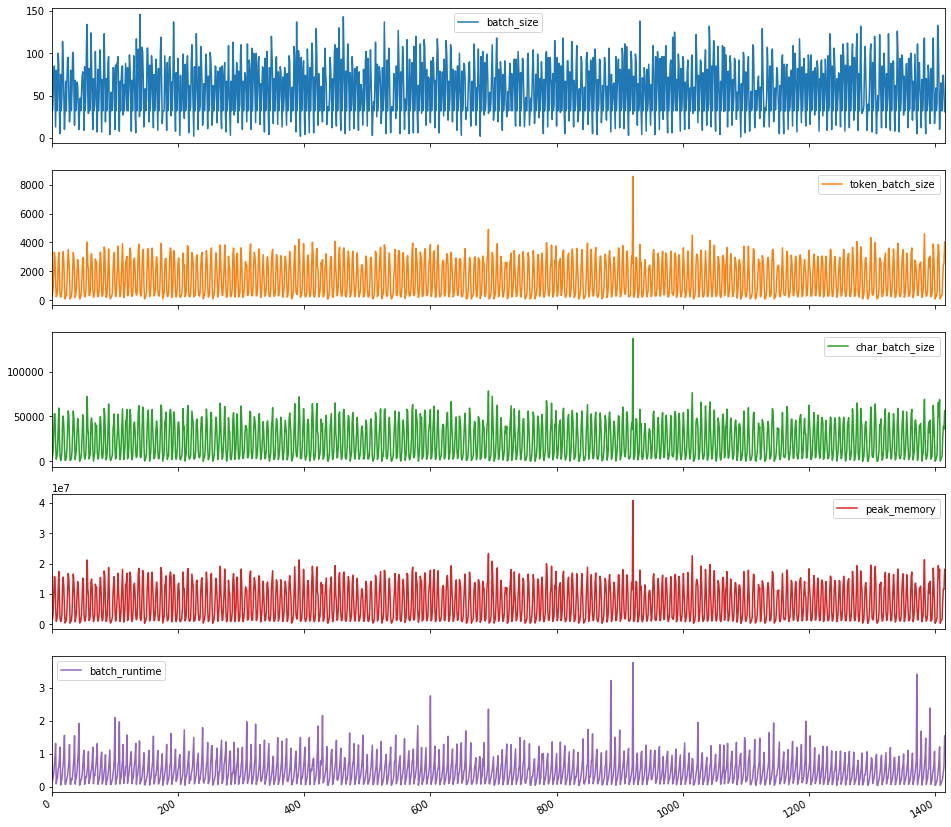

In [11]:
cleaned_batch_profile_df.plot(subplots=True, figsize=(16, 16));

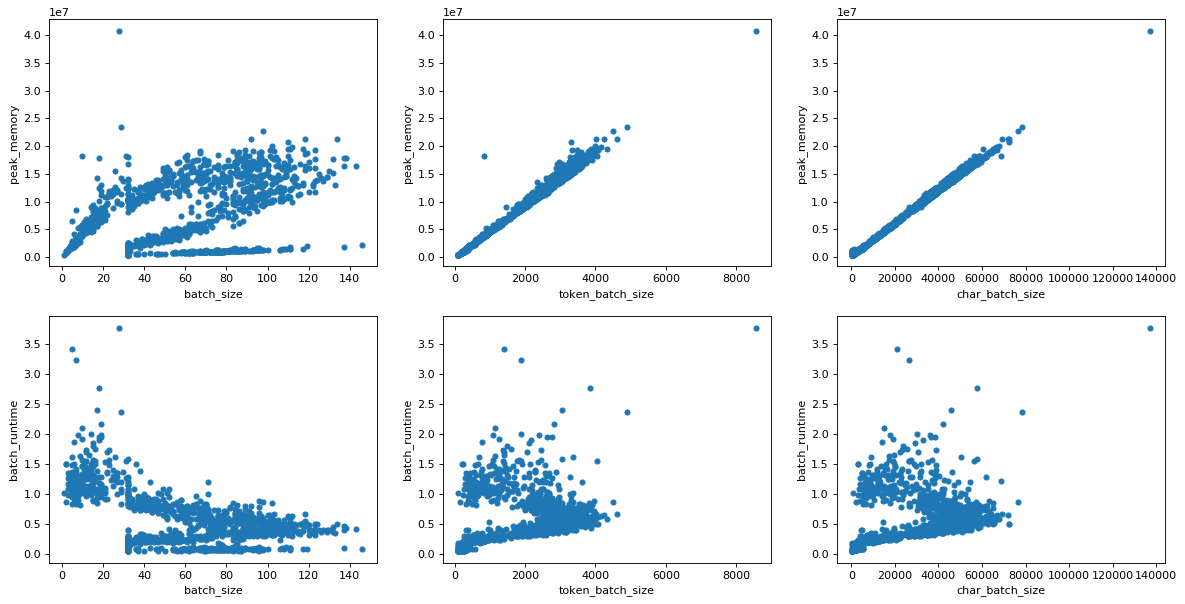

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9), dpi=80)

cleaned_batch_profile_df.plot.scatter(x='batch_size', y='peak_memory', ax=axes[0, 0])
cleaned_batch_profile_df.plot.scatter(x='token_batch_size', y='peak_memory', ax=axes[0, 1])
cleaned_batch_profile_df.plot.scatter(x='char_batch_size', y='peak_memory', ax=axes[0, 2])
cleaned_batch_profile_df.plot.scatter(x='batch_size', y='batch_runtime', ax=axes[1, 0])
cleaned_batch_profile_df.plot.scatter(x='token_batch_size', y='batch_runtime', ax=axes[1, 1])
cleaned_batch_profile_df.plot.scatter(x='char_batch_size', y='batch_runtime', ax=axes[1, 2])

In [14]:
max(cleaned_batch_profile_df['peak_memory'])/1024/1024

38.960052490234375